# Capstone Project - Car accident severity

This notebook will be mainly used for the capstone project

## Car Accident Severity Analysis


## Introduction

### 1.1. Background
Traffic accidents are a significant source of deaths, injuries, property damage, and a major concern for public health and traffic safety. Accidents are also a major cause of traffic congestion and delay. Effective management of accident is crucial to mitigating accident impacts and improving traffic safety and transportation system efficiency. The effective treatment of road accidents and thus the enhancement of road safety is a major concern to societies due to the losses in human lives and the economic and social costs. Tremendous efforts have been dedicated by transportation researchers and practitioners to improve road safety.

### 1.2 Problem
The world as a whole suffer due to car accidents. Accurate predictions of severity can provide crucial information for emergency responders to evaluate the severity level of accidents, estimate the potential impacts, and implement efficient accident management procedures. Previous years countrywide car accident dataset can be used to determining severity prediction.

### 1.3 Interest
Obviously, Government would be very interested in accurate prediction of accident Severity, because effective management of accident is crucial to mitigating accident impacts and improving traffic safety and transportation system efficiency.

## 2.Data acquisition and cleaning

### 2.1 Data sources
U.S countrywide car accident dataset data can be found in Kaggle datasets. Here  countrywide car accident dataset, which covers 49 states of the USA is used for the analysis. The accident data are collected from February 2016 to June 2020, using two APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 3.5 million accident records in this dataset.

### 2.2 Data cleaning
Data downloaded from kaggle were combined into one table. There were 3513637 accident records in this dataset. There were some missing data, because of lack of record keeping. The severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic. The columns End_Lat, End_Lng contains 74% null values so decided to drop the columns. Description include many distinct values decided to drop that column also. And there is many non-relevant columns in the dataset and they are analysed and removed. After removing the unwanted columns the rows contains nan value also removed. The time format is changed from string to time stamp and duration of the incident also calculated. 

### 2.3 Feature Selection
After data Cleaning there were 3414252 samples and 38 features in the data. Upon examining the meaning of each feature, it was clear that there was some redundancy in the features. From these highly correlated features, only one was kept, others were dropped from the dataset. After all, 23 features were selected.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('US_data.csv')
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
df.shape

(3513617, 49)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [5]:
df.isna().sum()

ID                             0
Source                         0
TMC                      1034799
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2478818
End_Lng                  2478818
Distance(mi)                   0
Description                    1
Number                   2262864
Street                         0
Side                           0
City                         112
County                         0
State                          0
Zipcode                     1069
Country                        0
Timezone                    3880
Airport_Code                6758
Weather_Timestamp          43323
Temperature(F)             65732
Wind_Chill(F)            1868249
Humidity(%)                69687
Pressure(in)               55882
Visibility(mi)             75856
Wind_Direction             58874
Wind_Speed(mph)           454609
Precipitat

In [6]:
df.drop(['TMC','End_Lat','End_Lng','Number','Wind_Chill(F)','Weather_Timestamp','Precipitation(in)','Wind_Speed(mph)','Pressure(in)','Wind_Direction'],axis=1,inplace=True)

In [7]:
df.drop(['Source'],axis=1,inplace=True)

In [8]:
df.isna().sum()

ID                           0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
Distance(mi)                 0
Description                  1
Street                       0
Side                         0
City                       112
County                       0
State                        0
Zipcode                   1069
Country                      0
Timezone                  3880
Airport_Code              6758
Temperature(F)           65732
Humidity(%)              69687
Visibility(mi)           75856
Weather_Condition        76138
Amenity                      0
Bump                         0
Crossing                     0
Give_Way                     0
Junction                     0
No_Exit                      0
Railway                      0
Roundabout                   0
Station                      0
Stop                         0
Traffic_Calming              0
Traffic_

In [9]:
df.dropna(axis=0, how='any',inplace=True)
df.shape

(3414252, 38)

In [10]:
df.isna().sum()

ID                       0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Temperature(F)           0
Humidity(%)              0
Visibility(mi)           0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
A

In [11]:
df['Duration'] = (pd.to_datetime(df['End_Time'])-pd.to_datetime(df['Start_Time'])).astype('timedelta64[m]')
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Duration
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,R,...,False,False,False,False,False,Night,Night,Night,Night,314.0
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,L,...,False,False,False,False,False,Night,Night,Night,Day,30.0
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,R,...,False,False,False,True,False,Night,Night,Day,Day,30.0
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,R,...,False,False,False,False,False,Night,Day,Day,Day,30.0
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,R,...,False,False,False,True,False,Day,Day,Day,Day,30.0


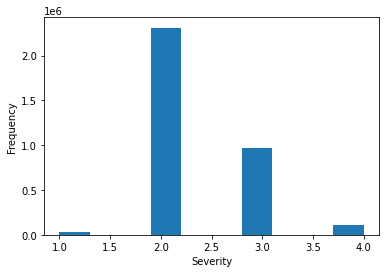

In [12]:
%matplotlib inline
df.Severity.plot(kind='hist')
plt.xlabel('Severity')
plt.ylabel('Frequency')
plt.show()

The following graphs help us to understand the possibility of accident in each case. 

<AxesSubplot:xlabel='State', ylabel='count'>

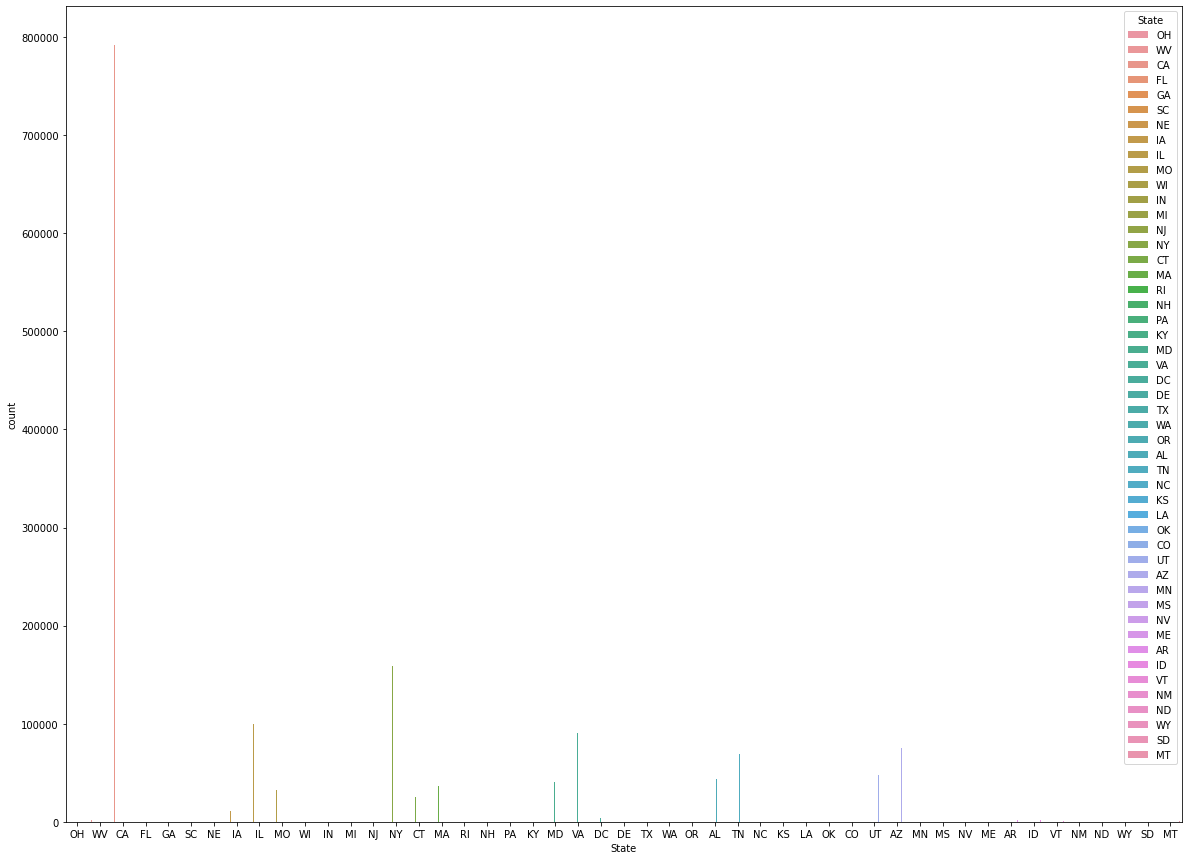

In [20]:
import seaborn as sns
plt.figure(figsize=(20,15))
sns.countplot(x='State', hue='State',data=df)

<AxesSubplot:xlabel='Bump', ylabel='count'>

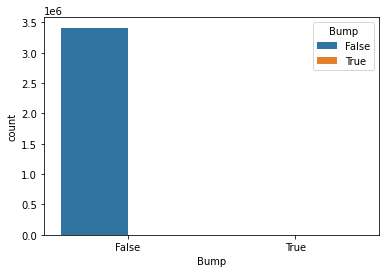

In [22]:
sns.countplot(x='Bump', hue='Bump',data=df)

<AxesSubplot:xlabel='Crossing', ylabel='count'>

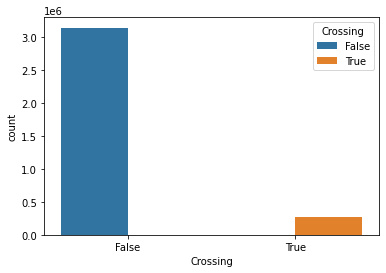

In [23]:
sns.countplot(x='Crossing', hue='Crossing',data=df)

<AxesSubplot:xlabel='Give_Way', ylabel='count'>

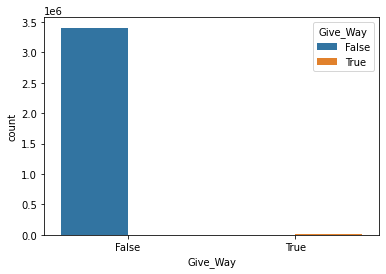

In [24]:
sns.countplot(x='Give_Way', hue='Give_Way',data=df)

<AxesSubplot:xlabel='Junction', ylabel='count'>

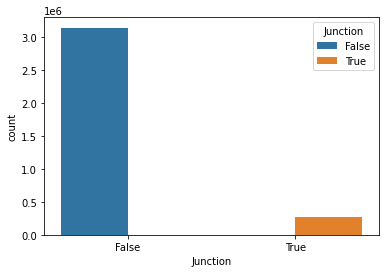

In [25]:
sns.countplot(x='Junction', hue='Junction',data=df)

<AxesSubplot:xlabel='Traffic_Signal', ylabel='count'>

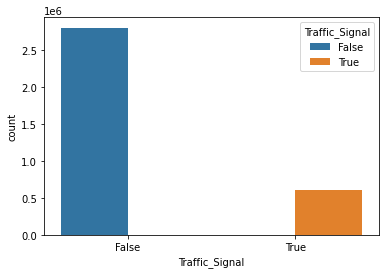

In [26]:
sns.countplot(x='Traffic_Signal', hue='Traffic_Signal',data=df)

<AxesSubplot:xlabel='No_Exit', ylabel='count'>

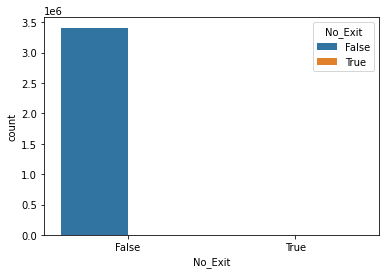

In [27]:
sns.countplot(x='No_Exit', hue='No_Exit',data=df)

<AxesSubplot:xlabel='Railway', ylabel='count'>

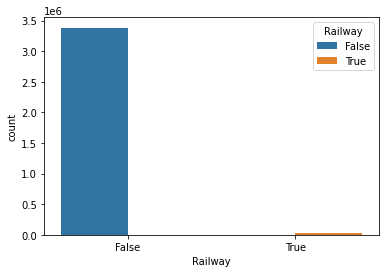

In [28]:
sns.countplot(x='Railway', hue='Railway',data=df)

<AxesSubplot:xlabel='Stop', ylabel='count'>

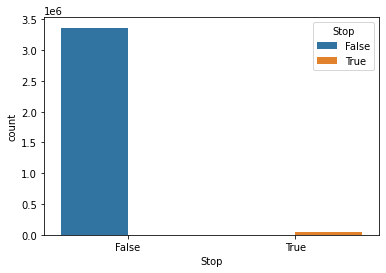

In [29]:
sns.countplot(x='Stop', hue='Stop',data=df)

<AxesSubplot:xlabel='Sunrise_Sunset', ylabel='count'>

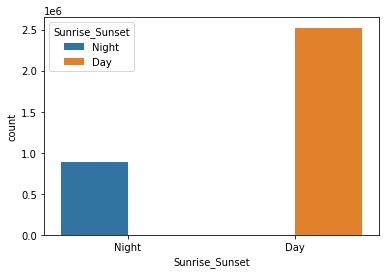

In [30]:
sns.countplot(x='Sunrise_Sunset', hue='Sunrise_Sunset',data=df)

In [31]:
df.drop(['Start_Time','End_Time','Description','Zipcode','Country','Timezone','Airport_Code','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'],axis=1,inplace=True)

In [32]:
pd.set_option('display.max_columns', None)
df.head()

,ID,Severity,Start_Lat,Start_Lng,Distance(mi),Street,Side,City,County,State,Temperature(F),Humidity(%),Visibility(mi),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Duration
0,A-1,3,39.865147,-84.058723,0.01,I-70 E,R,Dayton,Montgomery,OH,36.9,91.0,10.0,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,314.0
1,A-2,2,39.928059,-82.831184,0.01,Brice Rd,L,Reynoldsburg,Franklin,OH,37.9,100.0,10.0,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,30.0
2,A-3,2,39.063148,-84.032608,0.01,State Route 32,R,Williamsburg,Clermont,OH,36.0,100.0,10.0,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,30.0
3,A-4,3,39.747753,-84.205582,0.01,I-75 S,R,Dayton,Montgomery,OH,35.1,96.0,9.0,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,30.0
4,A-5,2,39.627781,-84.188354,0.01,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,36.0,89.0,6.0,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,30.0


## Correlation Heatmap

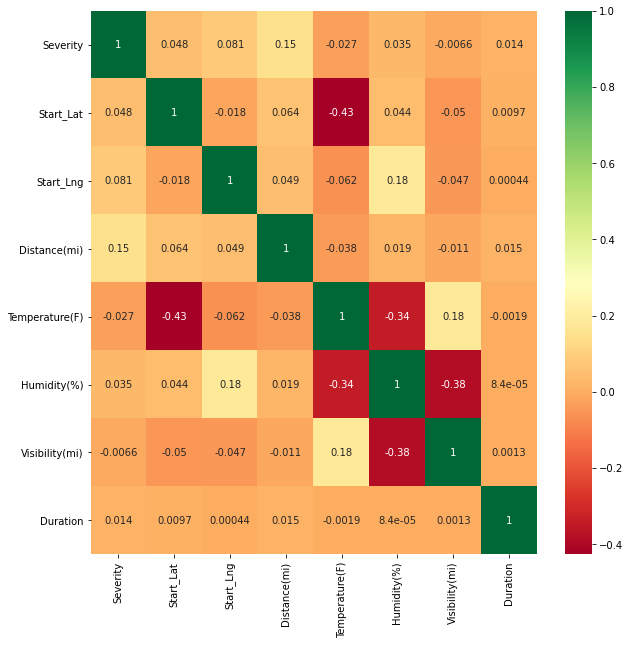

In [33]:
plt.figure(figsize = (10,10))
sns.heatmap(df[['Severity','Start_Lat','Start_Lng','Distance(mi)','Temperature(F)','Humidity(%)','Visibility(mi)','Duration']].corr(), annot = True, cmap = "RdYlGn")

plt.show()


## One Hot Encoding

In [34]:
df['State'].value_counts().sort_values(ascending=False)

CA    791682
TX    320859
FL    252439
SC    169023
NC    164465
NY    158457
PA    104556
IL     99223
MI     95573
GA     91837
VA     90431
OR     88439
MN     80210
AZ     75492
TN     69357
WA     67658
OH     65575
LA     60913
OK     59239
NJ     56312
CO     48867
UT     47542
AL     44011
MD     40734
MA     36275
MO     32818
IN     32779
CT     25719
NE     23771
KY     22391
WI     19977
RI     11248
IA     11026
NV     10487
NH      7845
MS      6402
DE      5677
NM      5498
KS      5325
DC      3971
WV      2337
ME      2191
ID      1943
AR      1902
VT       681
MT       497
WY       496
SD        60
ND        42
Name: State, dtype: int64

In [35]:
State=df[['State']]
State=pd.get_dummies(State,drop_first=True)
State.head()

,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
df['Weather_Condition'].value_counts().head(20)

Clear                           802053
Fair                            543637
Mostly Cloudy                   485941
Overcast                        379443
Partly Cloudy                   343207
Cloudy                          211543
Scattered Clouds                203548
Light Rain                      175764
Light Snow                       50286
Rain                             41518
Haze                             38169
Fog                              30698
Heavy Rain                       15194
Light Drizzle                    12337
Fair / Windy                      7887
Snow                              5734
Light Thunderstorms and Rain      4908
Mostly Cloudy / Windy             4430
Thunderstorm                      4363
Cloudy / Windy                    4309
Name: Weather_Condition, dtype: int64

In [37]:
Weather_Condition=df[['Weather_Condition']]
top46=[x for x in df.Weather_Condition.value_counts().sort_values(ascending=False).head(8).index]
for label in top46:
    Weather_Condition[label]=np.where(df['Weather_Condition']==label,1,0)
Weather_Condition.drop(['Weather_Condition'],axis=1,inplace=True)
Weather_Condition.head()

<ipython-input-37-12a2a89a70bb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Weather_Condition[label]=np.where(df['Weather_Condition']==label,1,0)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Clear,Fair,Mostly Cloudy,Overcast,Partly Cloudy,Cloudy,Scattered Clouds,Light Rain
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [38]:
Side=df[['Side']]
Side=pd.get_dummies(Side,drop_first=True)
Side.head()

,Side_L,Side_R
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1


In [39]:
Sunrise_Sunset=df[['Sunrise_Sunset']]
Sunrise_Sunset=pd.get_dummies(Sunrise_Sunset,drop_first=True)
Sunrise_Sunset.head()

,Sunrise_Sunset_Night
0,1
1,1
2,1
3,1
4,0


In [40]:
df.City.value_counts().head(50)

Houston            98932
Charlotte          78732
Los Angeles        78592
Dallas             64326
Austin             62262
Raleigh            44597
Atlanta            40910
Oklahoma City      36205
Miami              34058
Baton Rouge        33976
Nashville          32867
Sacramento         32474
Orlando            29013
Phoenix            27687
Minneapolis        26671
Seattle            25895
San Diego          25272
San Antonio        24358
Richmond           22848
Portland           20622
San Jose           20498
Indianapolis       19862
Denver             19757
Saint Paul         19571
Columbia           19069
Chicago            18869
Omaha              18776
Jacksonville       18548
Greenville         18114
Tulsa              16904
Rochester          14967
Detroit            14891
Oakland            14712
Tucson             14544
Dayton             14223
Flint              14163
Columbus           13117
Tampa              13095
Riverside          13015
Grand Rapids       12986


In [41]:
City=df[['City']]
top46=[x for x in df.City.value_counts().sort_values(ascending=False).head(46).index]
for label in top46:
    City[label]=np.where(df['City']==label,1,0)
City.drop(['City'],axis=1,inplace=True)
City.head()

<ipython-input-41-827116bfe221>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  City[label]=np.where(df['City']==label,1,0)


,Houston,Charlotte,Los Angeles,Dallas,Austin,Raleigh,Atlanta,Oklahoma City,Miami,Baton Rouge,Nashville,Sacramento,Orlando,Phoenix,Minneapolis,Seattle,San Diego,San Antonio,Richmond,Portland,San Jose,Indianapolis,Denver,Saint Paul,Columbia,Chicago,Omaha,Jacksonville,Greenville,Tulsa,Rochester,Detroit,Oakland,Tucson,Dayton,Flint,Columbus,Tampa,Riverside,Grand Rapids,Louisville,Salt Lake City,Long Beach,Fort Lauderdale,El Paso,Bronx
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [42]:
df.drop(['ID','Start_Lat','Start_Lng','Street','Side','City','County','State','Weather_Condition','Sunrise_Sunset'],axis=1,inplace=True)

## Concat Datafrsmes

In [43]:
dff=pd.concat([df,Weather_Condition,Side,Sunrise_Sunset],axis=1)
dff.shape

(3414252, 30)

In [44]:
dfff=dff.head(500000)   #Here the data set is very large for analyzing different ml methods. So we use first 5 Lakh raws for processing. 

In [45]:
X=dfff.drop(['Severity'],axis=1)
X.head()

,Distance(mi),Temperature(F),Humidity(%),Visibility(mi),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Duration,Clear,Fair,Mostly Cloudy,Overcast,Partly Cloudy,Cloudy,Scattered Clouds,Light Rain,Side_L,Side_R,Sunrise_Sunset_Night
0,0.01,36.9,91.0,10.0,False,False,False,False,False,False,False,False,False,False,False,False,False,314.0,0,0,0,0,0,0,0,1,0,1,1
1,0.01,37.9,100.0,10.0,False,False,False,False,False,False,False,False,False,False,False,False,False,30.0,0,0,0,0,0,0,0,1,1,0,1
2,0.01,36.0,100.0,10.0,False,False,False,False,False,False,False,False,False,False,False,True,False,30.0,0,0,0,1,0,0,0,0,0,1,1
3,0.01,35.1,96.0,9.0,False,False,False,False,False,False,False,False,False,False,False,False,False,30.0,0,0,1,0,0,0,0,0,0,1,1
4,0.01,36.0,89.0,6.0,False,False,False,False,False,False,False,False,False,False,False,True,False,30.0,0,0,1,0,0,0,0,0,0,1,0


In [46]:
X.shape

(500000, 29)

In [47]:
y=dfff['Severity']
y.head()

0    3
1    2
2    2
3    3
4    2
Name: Severity, dtype: int64

## Preprocessing Standard Scalar 

In [48]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X

array([[-0.07487315, -1.67788669,  1.23873879, ..., -0.46909256,
         0.46909573,  1.66271064],
       [-0.07487315, -1.61853327,  1.66040842, ...,  2.13177546,
        -2.13176104,  1.66271064],
       [-0.07487315, -1.73130476,  1.66040842, ..., -0.46909256,
         0.46909573,  1.66271064],
       ...,
       [ 0.46226022,  0.28671146,  0.02058207, ..., -0.46909256,
         0.46909573, -0.60142756],
       [-0.08708072,  0.4054183 , -0.02627011, ..., -0.46909256,
         0.46909573, -0.60142756],
       [-0.08708072,  0.82089222, -0.96331374, ..., -0.46909256,
         0.46909573, -0.60142756]])

## Train Test Data Split

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

## KNN 

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
l={}
for k in range(1,10):
    neig=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
    yhat=neig.predict(X_test)
    acc_score=metrics.accuracy_score(y_test,yhat)
    l[k]=acc_score
print(l)

In [ ]:
best_k = max(l, key=l.get)

In [68]:
neig=KNeighborsClassifier(n_neighbors=7).fit(X_train,y_train)
yhat=neig.predict(X_test)
print('Best K for KNN model :7'
      '\nCorresponding Accuracy:',metrics.accuracy_score(y_test,yhat))
print('f1 score:',f1_score(y_test,yhat,average='weighted'))

Best K for KNN model :7
Corresponding Accuracy: 0.67207
f1 score: 0.6707840478582769


## Decision  Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dt=dt.fit(X_train,y_train)

In [55]:
dt.score(X_test,y_test)

0.6754

In [56]:
dyhat=dt.predict(X_test)

In [57]:
print('f1 score:',f1_score(y_test,dyhat,average='weighted'))
print('Accuracy score:',metrics.accuracy_score(y_test,dyhat))

f1 score: 0.67519080668298
Accuracy score: 0.6754


## Logistric Regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix            
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)   #C parameter indicates inverse of regularization strength 
LR

LogisticRegression(C=0.01, solver='liblinear')

In [51]:
LR.score(X_test,y_test)

0.67088

In [52]:
lyhat=LR.predict(X_test)

In [53]:
from sklearn import metrics
from sklearn.metrics import f1_score
print('f1 score:',f1_score(y_test,lyhat,average='weighted'))
print('Accuracy score:',metrics.accuracy_score(y_test,lyhat))

f1 score: 0.6720916706047082
Accuracy score: 0.67088


## SVM

In [58]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_test, y_test) 

SVC()

In [59]:
clf.score(X_test, y_test)

0.67319

In [61]:
yhat_svm=clf.predict(X_test)

In [62]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools
cnf=confusion_matrix(y_test,yhat_svm)
np.set_printoptions(precision=2)
print('Classification Report:\n',classification_report(y_test,yhat_svm))

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        84
           2       0.78      0.67      0.72     62503
           3       0.55      0.68      0.61     37362
           4       0.00      0.00      0.00        51

    accuracy                           0.67    100000
   macro avg       0.33      0.34      0.33    100000
weighted avg       0.69      0.67      0.68    100000



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
print('f1 score:' , metrics.f1_score(y_test,yhat_svm,average='weighted'))
print('Accuracy_score:',metrics.accuracy_score(y_test,yhat_svm))

f1 score: 0.6774341492949696
Accuracy_score: 0.67319
